
-*- coding: utf-8 -*-
Created on Tue Jul 13 11:07:00 2021

@author: Joanna Brown, Github : jbrown888

Basics of Matplotlib Graph formatting settings

By no means is this a definitive guide, or the best way of doing things, and it's definitely not complete. But hopefully it gives some basic ideas for formatting, and serves as a starting point for plotting. Note - my terminology for axes objects etc may be incorrect.

Extra tips: stackoverflow and the matplotlib and numpy websites are your friends!
90% of the time your question has already been asked by somebody else on stack overflow, and the documentation for the python websites is actually quite good.

https://matplotlib.org/
https://numpy.org/


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm #colormap library
from scipy.stats import norm

# Object oriented graphs - using axes objects

By creating objects, you can access and alter the properties more easily than if you use plt.plot(...), but it is a little difficult to wrap your head around at first. 
It saves massive amounts of time, as you can create default settings for these objects, and apply functions to them.
You can do this because Python is an object oriented programming language, and has objects and classes - this is the fun bit! You can even create your own classes.


Aside: confusingly, the axes object is not actually the axes of the graph - it's kind of a canvas on which you add stuff like plot lines and the x and y axis. Could be helpful to look at a diagram of how the objects are defined.

In [2]:
#Some settings to apply to graphs to nicely format them

def standard_axes_settings(ax):
        """
        A function to apply standard settings to a graph for label sizes, gridlines, frame etc.
        
        input argument ax is an axes object of matplotlib

        """
        ax.set_frame_on # adds frame around plot
        ax.grid(b=True, which='major', axis='both', c='grey', ls='--', lw = 1) #adds major grid lines
        # ax.grid(b=True, which='minor', axis='both', c='darkgrey', ls = '--', linewidth =2) # adds minor grid lines
        ax.tick_params(axis ='both', which = 'major', direction ='in', labelsize = 22) # adds major ticks (the little marks on axes like on a ruler) 
        ax.tick_params(axis ='both', which = 'minor', direction ='in') # adds minor ticks
        ax.xaxis.label.set_size(28) # sets size of axis labels (the numbers on the axis)
        ax.yaxis.label.set_size(28)
        # ax.minorticks_on() # turns on minor ticks
        ax.yaxis.get_offset_text().set_fontsize(20) # sets fontsize of the axis label i.e. the "Time [s]" bit
        ax.xaxis.get_offset_text().set_fontsize(20)
        ax.ticklabel_format(axis = 'x', style = 'sci', scilimits = (-3,3), useOffset = True) # formats the numbering of the axes if you have really big or really small numbers - if >1e3 or <1e-3, will use scientific notation automatically
        ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (-3,3), useOffset=True)

# these settings can be copy and pasted out of the function and applied individually to each graph - but putting it in a function like this saves you having to rewrite it all everytime you make a new graph


In [22]:
#FORMATTING ARGUMENTS - COLOURS ETC

red = 'indianred' # a nice red
blue = 'royalblue' # a nice blue

# this is a dictionary of arguments to set the style of the line/points you draw
plot_arguments = {'marker':'o', #marker style
                  'lw':3, #line width
                  'ms':8, #marker size
                  'ls':'--', #line style
                  'c': 'k', #line color
                  'mew':2, #marker edge width
                  'mec': 'red', #marker edge color
                  'mfc':'None',#marker face color
                  } 

plot_arguments_y = {'marker':'x', #marker style
                  'lw':3, #line width
                  'ms':9, #marker size
                  'ls':':', #line style - none gives no line
                  'c': 'darkslategray', #line color
                  'mew':2, #marker edge width
                  'mec': 'blue', #marker edge color
                  'mfc':'blue',#marker face color
                  } # same thing but for the y data, to distinguish from the x data



In [4]:
#CREATE SOME DATA
def example_function(t):
    return (t-6.5)**2
t = np.linspace(0, 4*np.pi, 25) # generates evenly distributed points
y = 30*np.sin(t)
x = example_function(t)


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


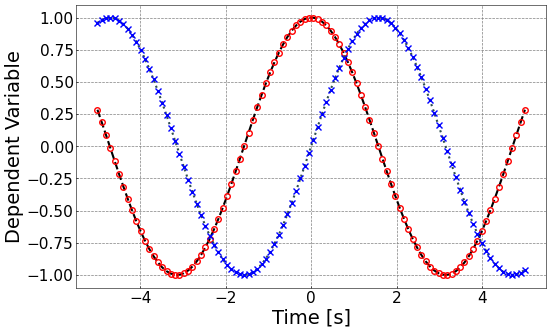

In [23]:
#PLOTTING
fig = plt.figure(figsize = (1.618*7.5,7.5), dpi = 50)# creates a figure (fig)
ax = fig.add_subplot(111) #creates axes (ax) object. 
standard_axes_settings(ax) # applies formatting to the graph (axes object)

#plot the data
ax.plot(t, x, **plot_arguments, label = 'x data') # plot x data
ax.plot(t, y, **plot_arguments_y, label = 'y data') # plot y data
#the **plot_arguments adds all the items in the dictionary plot_arguments into the plot as if you had written them directly as ax.plot(t, x, lw = 3, marker = 'o',... etc). Just makes the code a little bit neater

# Set x and y axis labels
ax.set_xlabel('Time [s]')
ax.set_ylabel('Dependent Variable')


ax = fig.add_subplot()
plt.show()

### Legends
There are a few ways of creating legends. Here are two - method A and B. Notice both produce the same result. You can't use both at the same time - one will overwrite the other

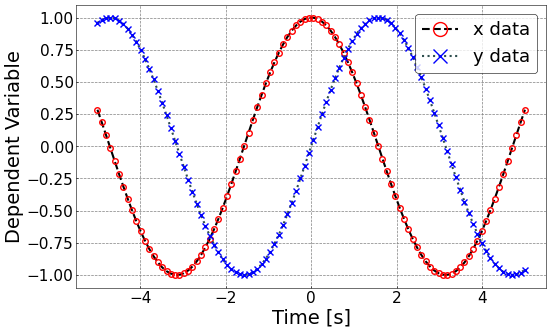

In [24]:
fig = plt.figure(figsize = (1.618*7.5,7.5), dpi = 50)# creates a figure (fig)
ax = fig.add_subplot(111) #creates axes (ax) object. 
standard_axes_settings(ax)
ax.plot(t, x, **plot_arguments, label = 'x data')
ax.plot(t, y, **plot_arguments_y, label = 'y data')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Dependent Variable')


# Method A. Since I labelled my data when I plotted it (label = 'x data' etc in the ax.plot() line)
# I can simply call legend directly and Python will automatically create the legend with the correct key. Nice! 

leg = ax.legend(fontsize = 26, loc='best', markerfirst = True, frameon = True) # creates a legend for the axes object ax that I created earlier

# Method B. If displaying lots of data on one plot, it may be more useful to customise the legend and create your own entries

plot_arguments['ms'] = 20 #rewrite marker size so that marker is large in legend
plot_arguments_y['ms'] = 20
handles = [mpl.lines.Line2D([], [], **plot_arguments), mpl.lines.Line2D([], [], **plot_arguments_y)] # creates the symbols 
#for the legend - note that it reuses the arguments from x, y so we can be sure they are the correct symbols
labels = ['x data', 'y data'] # labels for legend
leg = ax.legend(handles, labels, fontsize = 26, loc='best', markerfirst = True, frameon = True) # creates custom legend

#general formatting of legend for either method

leg.get_frame().set_edgecolor('k')
leg.get_frame().set_facecolor('w')
plt.show()


# Color Ranges and color maps

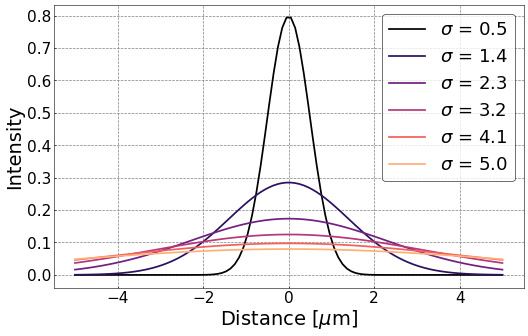

In [26]:
# When you have plots for the same data but with different parameters, it can be helpful to use the matplotlib colourmaps to clearly show trends in data
fig = plt.figure(figsize = (1.618*7.5,7.5), dpi = 50)# creates a figure (fig)
ax = fig.add_subplot(111) #creates axes (ax) object. 
standard_axes_settings(ax)
t = np.linspace(-5, 5, 100)
mean = 0.0
Z = np.linspace(0.5, 5, 6) # values for standard deviation (sigma)

cs = [cm.magma(i/len(Z), 1) for i in range(len(Z))] # creates list of colours according to the colour map magma, evenly distributed over the range of Z. Colour maps available at https://matplotlib.org/stable/tutorials/colors/colormaps.html

# here for the labels I use f-string formatting. This was new with Python 3 and is (in my opinion) much nicer than the previous way.

for i, stddev in enumerate(Z): # iterate over the different values of standard deviation
    x = norm.pdf(t, loc = mean, scale = stddev)
    ax.plot(t, x, marker = 'None', ls = '-', lw = 2.5, color = cs[i], label = fr'$\sigma$ = {stddev:.1f}')
    
    
ax.set_xlabel(r'Distance [$\mu$m]')
ax.set_ylabel('Intensity')

leg = ax.legend(fontsize = 26, loc='best', markerfirst = True, frameon = True) # creates a legend for the axes object ax that I created earlier

leg.get_frame().set_edgecolor('k')
leg.get_frame().set_facecolor('w')


#if in jupyter notebooks, uncomment the following to fix the figure size



# 4 Subplots

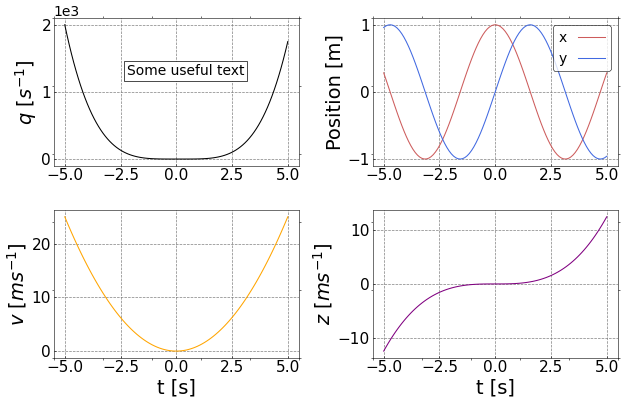

In [47]:
#NOTE; this is very messily done and not good coding practise. But it works...

t = np.linspace(-5, 5, 100)
x = np.cos(t)
y = np.sin(t)
z = t**3/10
v = t**2
q = 3*t**4 -t**3 +2
fig, AXES = plt.subplots(1, 2, sharex = True, sharey = False,figsize = (1.618*9,9), dpi = 50) # create 2 subplots - allows shared axes like this
fig.frameon = False
[AXL, AXR] = AXES # left and right subplot
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(222)
ax4 = fig.add_subplot(224)
axes = [ax1, ax2, ax3, ax4]
fig.subplots_adjust(wspace =0.3, hspace=0.3) # adjust spacing

for AX in AXES:
    AX.spines['top'].set_color('None') # remove visible frame from the the left and right underlying subplots
    AX.spines['bottom'].set_color('None')
    AX.spines['left'].set_color('None')
    AX.spines['right'].set_color('None')
    AX.set_facecolor('None')
    # AX.set_xticklabels([])
    # AX.set_yticklabels([])
    AX.tick_params(labelcolor='None', top='off', bottom='off', left='off', right='off')
    
for ax in axes: #format the 4 axes
    standard_axes_settings(ax)

axes[2].plot(t, x, '-', label='x(t)',linestyle= '-', color = red)
axes[2].plot(t, y, '-', label='y(t)',linestyle= '-', color = blue)
# axes[2].set_xlabel('t [s]')
axes[2].set_ylabel('Position [m]')

axes[3].plot(t, z, '-', label='z(t)', linestyle= '-', color = 'purple')
axes[3].set_xlabel('t [s]')
axes[3].set_ylabel(r'$z$ [${ms}^{-1}$]')

axes[1].plot(t, v, '-', label=r'$v$(t)',linestyle= '-', color = 'orange')
axes[1].set_xlabel(r't [s]')
axes[1].set_ylabel(r'$v$ [${ms}^{-1}$]')

axes[0].plot(t, q, '-', label=r'$v$(t)',linestyle= '-', color = 'k')
# axes[0].set_xlabel('t [s]')
axes[0].set_ylabel(r'$q$ [${s}^{-1}$]')

handles = [mpl.lines.Line2D([0], [0], ls = '-', color = red), mpl.lines.Line2D([0], [0], ls = '-', color = blue)]
leg1 = axes[2].legend(handles = handles, labels = ['x', 'y'], fontsize = 20, loc='best', markerfirst = False, frameon = True)
leg1.get_frame().set_edgecolor('k')
leg1.get_frame().set_facecolor('w')

#add annotating text
bbox_props = dict(boxstyle = "square,pad=0.2", fc = "w", ec ="k", lw = 1)
axes[0].text(-2.2, 1.25e3, 'Some useful text', fontsize = 20, bbox = bbox_props)

plt.show()


# F-strings and Latex

In [50]:
#These expressions won't work printing in e.g. spyder console, but will work in matplotlib for labels, legends etc.
#Using LaTeX with strings:
print(r'$\theta$')

theta = 35.4282711
#Using LaTeX and f-string formatting
print(fr'$\theta$ = {theta:.2f}')

#Using f-string and latex together but you need {} in Latex:
print(fr'$\Delta_{{\mu}}$ = {np.pi:.2f}')

$\theta$
$\theta$ = 35.43
$\Delta_{\mu}$ = 3.14
